#### Lab 6 Report

Author names go here 

Michael Lee, David Yu, Wengjie Ma

(This should be a markup cell, which means that when you run it you just get formated text.)

In [1]:
# We'll refer to this as the "import cell." Every module you import should be imported here.
%matplotlib notebook
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
# import whatever other modules you use in this lab -- there are more that you need than we've included 
import decimal
import scipy
from scipy.io import wavfile as wav
from scipy import signal as sig
import simpleaudio as sa
from scipy import signal


# Assignment 1 - Filtering

<IPython.core.display.Javascript object>


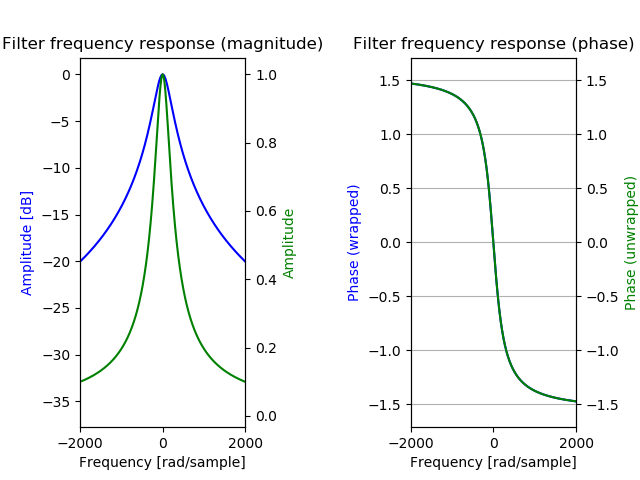

<IPython.core.display.Javascript object>


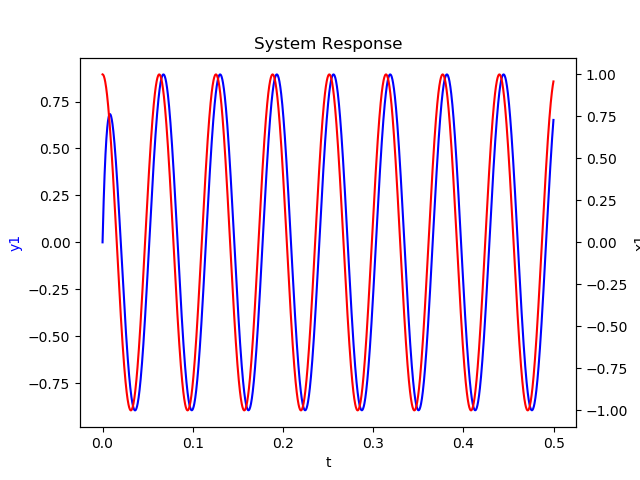

C:\Users\Michael\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


Text(0,0.5,'x1')

In [57]:
# A
fs = 4000
t = np.arange(0,0.5,1/fs)
x1 = np.cos(100*t)

# B
nfft = 8192

b = [200]
a = [1, 200]
sys = [b,a]

f = np.arange(-nfft/2,nfft/2,1)*fs/nfft
w = f*2*np.pi
w2,h_f = signal.freqresp(sys,w)

fig = plt.figure(1)
fig.subplots_adjust(hspace = 1, wspace = 1)

ax1 = fig.add_subplot(121)
plt.title('Filter frequency response (magnitude)')
plt.plot(w,20*np.log10(abs(h_f)), 'b')
plt.ylabel('Amplitude [dB]', color = 'b')
plt.xlabel('Frequency [rad/sample]')

ax2 = ax1.twinx()
plt.plot(w, abs(h_f), 'g')
plt.ylabel('Amplitude', color = 'g')
plt.xlim(-2000,2000)

ax1 = fig.add_subplot(1,2,2)
plt.title('Filter frequency response (phase)')
plt.plot(w, np.angle(h_f), 'b')
plt.ylabel('Phase (wrapped)', color='b')
plt.xlabel('Frequency [rad/sample]')

ax2 = ax1.twinx()
angles = np.unwrap(np.angle(h_f))
plt.plot(w, angles, 'g')
plt.ylabel('Phase (unwrapped)', color = 'g')
plt.grid()
plt.axis('tight')
plt.xlim(-2000,2000)

# C
ty1, y1, xs = signal.lsim((b,a),x1, t)
fig2 = plt.figure(2)
plt.title('System Response')
ax1 = fig2.add_subplot(111)
plt.plot(t, y1, 'b')
plt.ylabel('y1', color = 'b')
plt.xlabel('t')
ax2 = ax1.twinx()
plt.plot(t, x1, 'r')
plt.ylabel('x1')

Discussion
In my opinion, I strongly believe that having two of the identical filters above will lead to an more exaggerated version of the filter inputted. This is because that having two fickle filter response like above being identical and in series will lead to the values being squared and being more exagerrated in the positive and negative domains.

# Assignment 2 - Amplitude Modulation

<IPython.core.display.Javascript object>


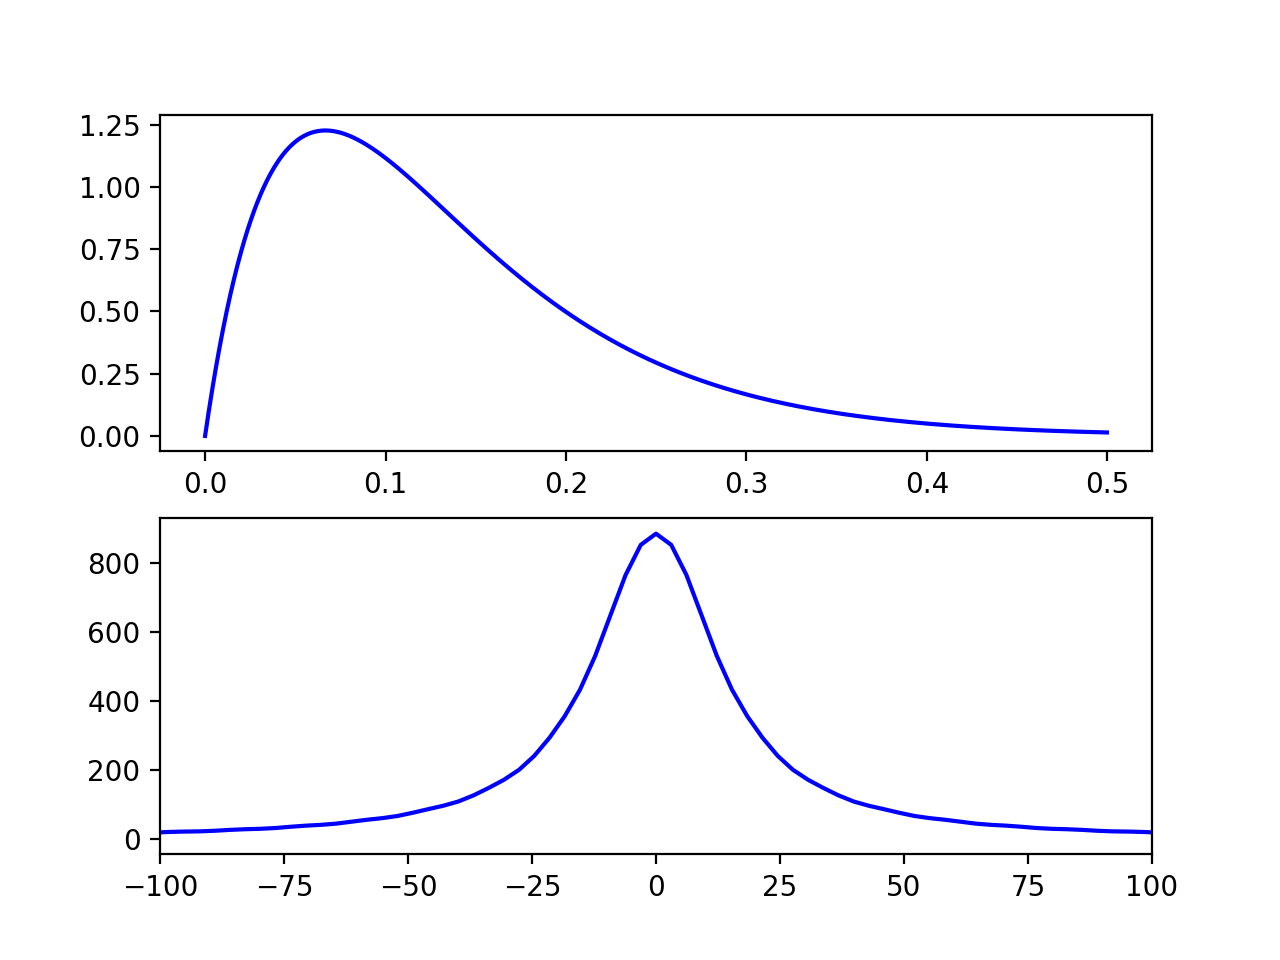

<IPython.core.display.Javascript object>


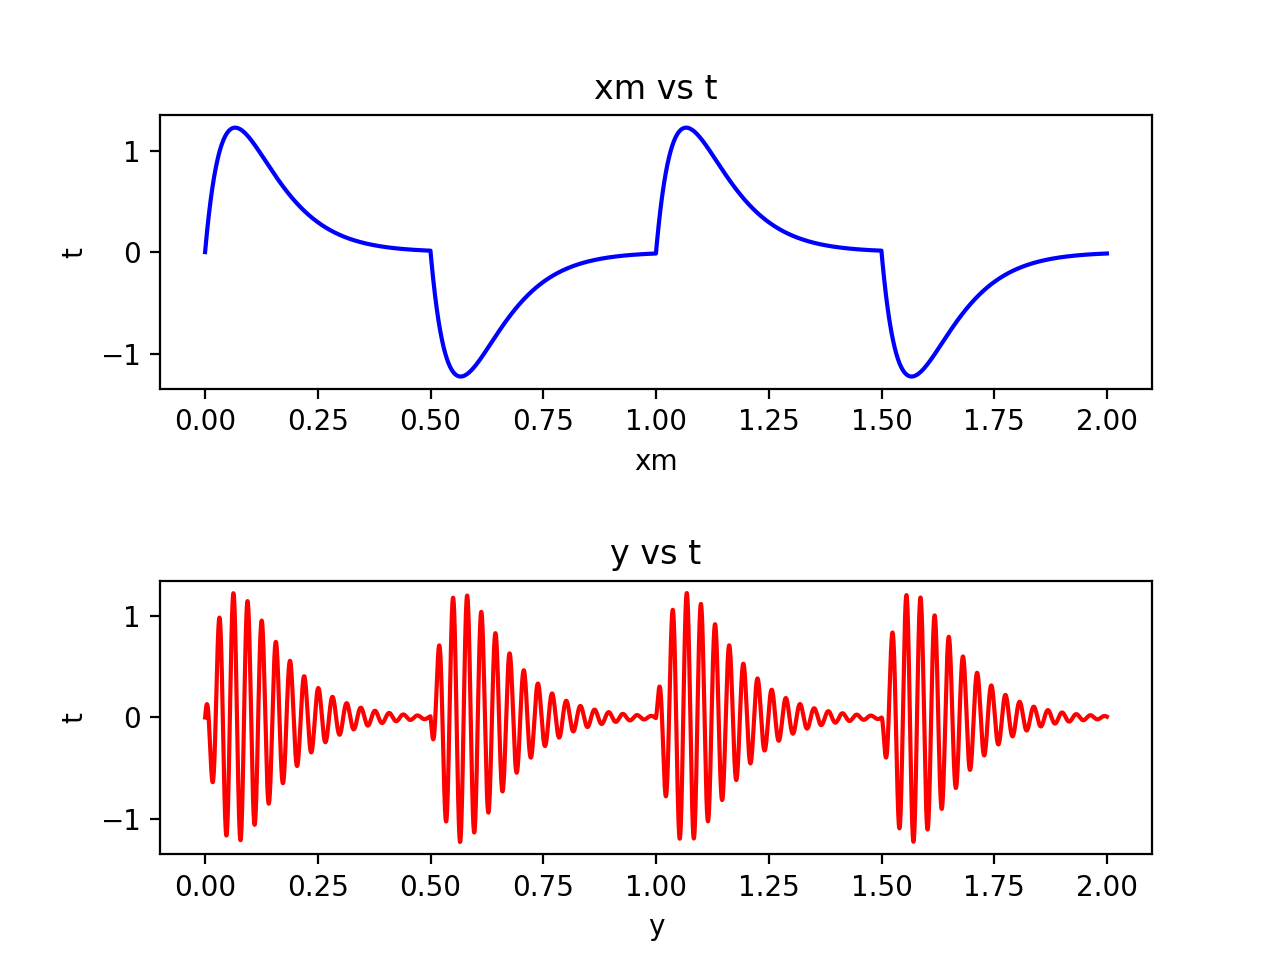

<IPython.core.display.Javascript object>


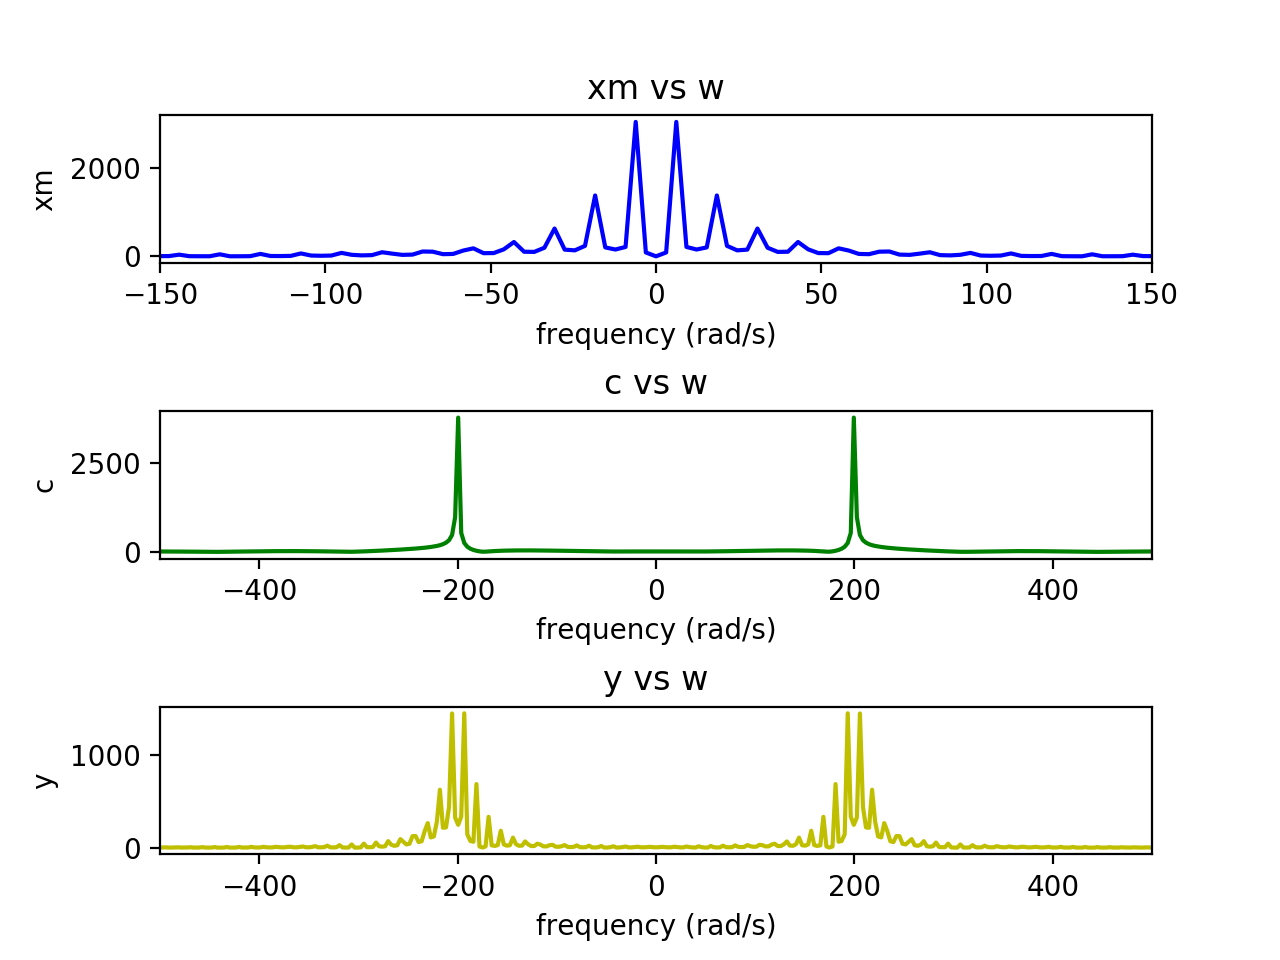

Text(0,0.5,'y')

In [2]:
# A
# a
fs = 4000
t = np.arange(0, 0.5, 1/fs)
u = np.heaviside(t,1)
x1 = 50 * t * np.exp(-15*t)* u
x0 = -x1

# b
nfft = 8192
w = 2 * np.pi * np.arange(-nfft/2,nfft/2,1)*fs/nfft
x1_ft = np.fft.fftshift(np.abs(np.fft.fft(x1,nfft)))

x0_ft = np.fft.fftshift(np.abs(np.fft.fft(x0,nfft)))
x0_fts = np.fft.fftshift(x0_ft)

fig = plt.figure(1)

plt.subplot(2,1,1)
plt.plot(t, x1, 'b')

plt.subplot(2,1,2)
plt.plot(w, x1_ft, 'b')
plt.xlim(-100,100)

# B

t1 = np.arange(0,2,1/fs)

# a
xm = np.concatenate([x1, x0, x1, x0])

# b
c = np.cos(200*t1)

# c
y = xm*c

# C
fig2 = plt.figure(2)
fig2.subplots_adjust(hspace = .7, wspace = 1)

plt.subplot(211)
plt.title('xm vs t')
plt.plot(t1,xm,'b')
plt.ylabel('t')
plt.xlabel('xm')
plt.subplot(212)
plt.title('y vs t')
plt.plot(t1,y,'r')
plt.ylabel('t')
plt.xlabel('y')

# D
xm_ft = np.fft.fftshift(np.abs(np.fft.fft(xm,nfft)))
c_ft = np.fft.fftshift(np.abs(np.fft.fft(c,nfft)))
y_ft = np.fft.fftshift(np.abs(np.fft.fft(y,nfft)))

fig3 = plt.figure(3)
fig3.subplots_adjust(hspace = 1, wspace = 1)

plt.subplot(3,1,1)
plt.title("xm vs w")
plt.plot(w, xm_ft, 'b')
plt.xlim(-150,150)
plt.xlabel('frequency (rad/s)')
plt.ylabel('xm')

plt.subplot(3,1,2)
plt.title('c vs w')
plt.plot(w, c_ft, 'g')
plt.xlim(-500,500)
plt.xlabel('frequency (rad/s)')
plt.ylabel('c')

plt.subplot(3,1,3)
plt.title('y vs w')
plt.plot(w, y_ft,'y')
plt.xlim(-500,500)
plt.xlabel('frequency (rad/s)')
plt.ylabel('y')

Discussion
 
It is not LTI because cos has multiple of the same outputs for different inputs so it is not reversible. Also, cosine is not linear so it is not LTI.

# Assignment 3 - Amplitude Demodulation

<IPython.core.display.Javascript object>


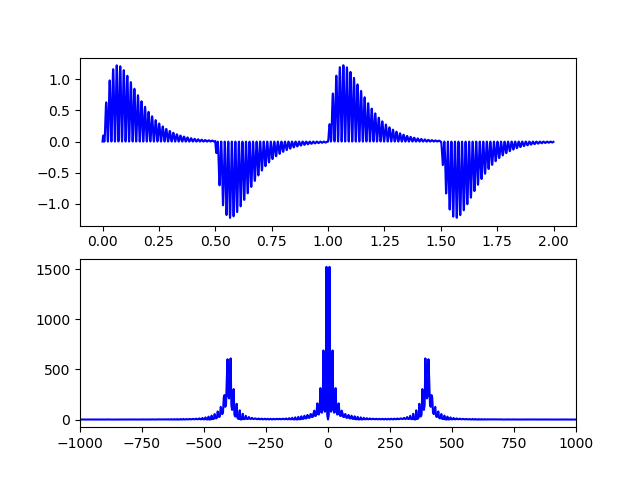

<IPython.core.display.Javascript object>


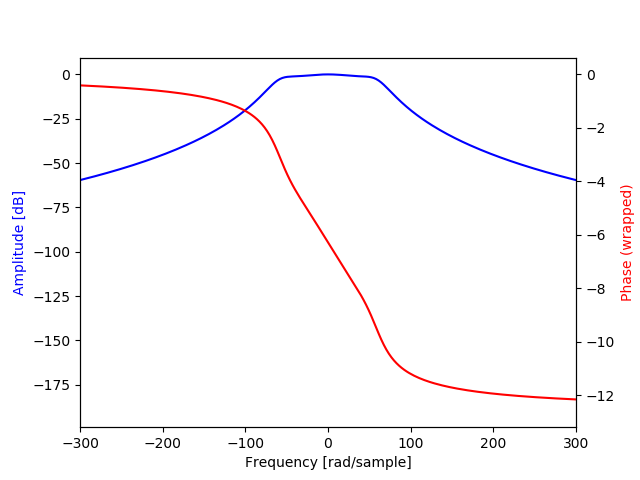

<IPython.core.display.Javascript object>


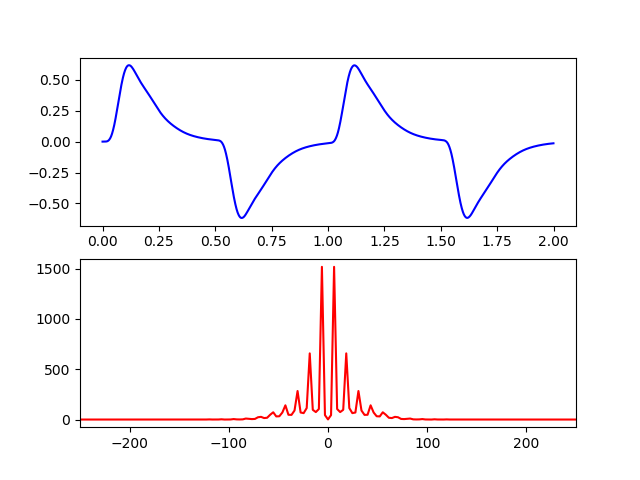

(-250, 250)

In [11]:
# A
fs = 4000
t = np.arange(0, 0.5, 1/fs)
u = np.heaviside(t,1)
x1 = 50 * t * np.exp(-15*t)* u
x0 = -x1
xm = np.concatenate([x1, x0, x1, x0])
c = np.cos(200*t1)
y = xm*c

t1 = np.arange(0,2,1/fs)
nfft = 8192
z = y * c

w = 2 * np.pi * np.arange(-nfft/2,nfft/2,1)*fs/nfft
z_ft = np.fft.fftshift(np.abs(np.fft.fft(z,nfft)))

fig = plt.figure(1)
plt.subplot(211)
plt.plot(t1,z,'b')
plt.subplot(212)
plt.plot(w, z_ft,'b')
plt.xlim(-1000,1000)

# B
b = [2*10**9]
a = [240, 3*10**4,2.2*10**6,10**8,2*10**9]
sys = [b,a]
f = np.arange(-nfft/2,nfft/2,1)*fs/nfft
w = f*2*np.pi
w2,h_f = signal.freqresp(sys,w)

fig2 = plt.figure(2)

ax1 = fig2.add_subplot(111)
plt.plot(w,20*np.log10(abs(h_f)), 'b')
plt.ylabel('Amplitude [dB]', color = 'b')
plt.xlabel('Frequency [rad/sample]')
ax2 = ax1.twinx()
plt.plot(w, np.unwrap(np.angle(h_f)), 'r')
plt.ylabel('Phase (wrapped)', color='r')
plt.xlabel('Frequency [rad/sample]')
plt.xlim(-300,300)

# C
txr, xr, xs = signal.lsim((b,a), z, t1)

w = 2 * np.pi * np.arange(-nfft/2,nfft/2,1)*fs/nfft
xr_ft = np.fft.fftshift(np.abs(np.fft.fft(xr,nfft)))

fig3 = plt.figure(3)

plt.subplot(211)
plt.plot(txr, xr, 'b')
plt.subplot(212)
plt.plot(w, xr_ft, 'r')
plt.xlim(-250,250)

Discussion

If you use a much shorter signal, the frequency will be much higher, so when you modulate the signal, there could be overlap and the filter might not filter out the correct frequencies. The min frequency for smampling needed changes because of the higher frequency so it might not work.

# Assignment 4 - Decoding a Morse Code Message

In [49]:
# A

def decode(y):
    fs = 4000
    t = np.arange(0,0.5,1/fs)
    
    X = "";
    
    u = np.heaviside(t,1)
    xdash = 50*t*np.exp(-15*t)*u
    xdot = -xdash
        
    x1 = y[0:2000]
    x2 = y[2000:4000]
    x3 = y[4000:6000]
    x4 = y[6000:8000]
      
    x1_mse_dit = np.sum((x1 - xdot)**2)
    x1_mse_dah = np.sum((x1 - xdash)**2)
    x2_mse_space = np.sum((x2)**2)
    x2_mse_dit = np.sum((x2 - xdot)**2)
    x2_mse_dah = np.sum((x2 - xdash)**2)
    x3_mse_space = np.sum((x3)**2)
    x3_mse_dit = np.sum((x3 - xdot)**2)
    x3_mse_dah = np.sum((x3 - xdash)**2)
    x4_mse_space = np.sum((x4)**2)
    x4_mse_dit = np.sum((x4 - xdot)**2)
    x4_mse_dah = np.sum((x4 - xdash)**2)
    
    if (x1_mse_dit > x1_mse_dah):
        X = '-'
    else:
        X = '.'
        
    if (x2_mse_space < 5):
        X = X + '0'
    elif (x2_mse_dit > x2_mse_dah):
        X = X + '-'
    else:
        X = X + '.'
        
    if (x3_mse_space < 5):
        X = X + '0'
    elif (x3_mse_dit > x3_mse_dah):
        X = X + '-'
    else:
        X = X + '.'
        
    if (x4_mse_space < 5):
        X = X + '0'
    elif (x4_mse_dit > x4_mse_dah):
        X = X + '-'
    else:
        X = X + '.'
        
    morseCode = [["A", "B", "C", "D", "E", "F", "G", "H", "I", "J", "K", "L", "M", "N", "O", "P", "Q", "R", "S", "T", "U", "V", "W", "X", "Y", "Z"],[".-00", "-...", "-.-.", "-..0", ".000", "..-.", "--.0", "....", "..00", ".---", "-.-0", ".-..", "--00", "-.00", "---0", ".--.", "--.-", ".-.0", "...0", "-000", "..-0", "...-", ".--0", "-..-", "-.--", "--.."]]
    
    Xdecoded = "";
    
    index = 0;
    for p in morseCode[1][:]:
        if (X==p):
            Xdecoded = morseCode[0][index]
        index += 1
        
    return Xdecoded

In [51]:
# B

file = open('message_modulated.csv', 'rb')
rm = np.loadtxt(file,delimiter=',')

b = [2*10**9]
a = [240, 3*10**4,2.2*10**6,10**8,2*10**9]
sys = signal.lti(b,a)

# C
fs = 4000
t = np.arange(0,2,1/fs)

y = [100,200,400]
decoded = "";

for num in y:
    # a
    current = rm * np.cos(num*t)
    # b
    tyr, yr, xs = signal.lsim(sys, current, t)
    # c
    decoded += decode(yr)
    
print(decoded)


YOU


Discussion

The future of technology lies in you